In [1]:
# import the required libraries.
import numpy as np 
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# stock data.
df=pd.read_csv("/home/pushpinder/Downloads/archive (3)/all_stocks_5yr.csv")
# considered AAL stock.
df=df[df['Name']=='AAL']

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL


In [4]:
# Monte Carlo Simulation for Forecasting.

# pct_change = (current - previous) / previous.

# 1 + pct_change = 1 + (current - previous) / previous =current / previous.

# log returns of the df.close column.
log_returns = np.log(1 + df.close.pct_change())

Text(0.5, 1.0, 'Plot of the Distribution of the Logarithmic Returns')

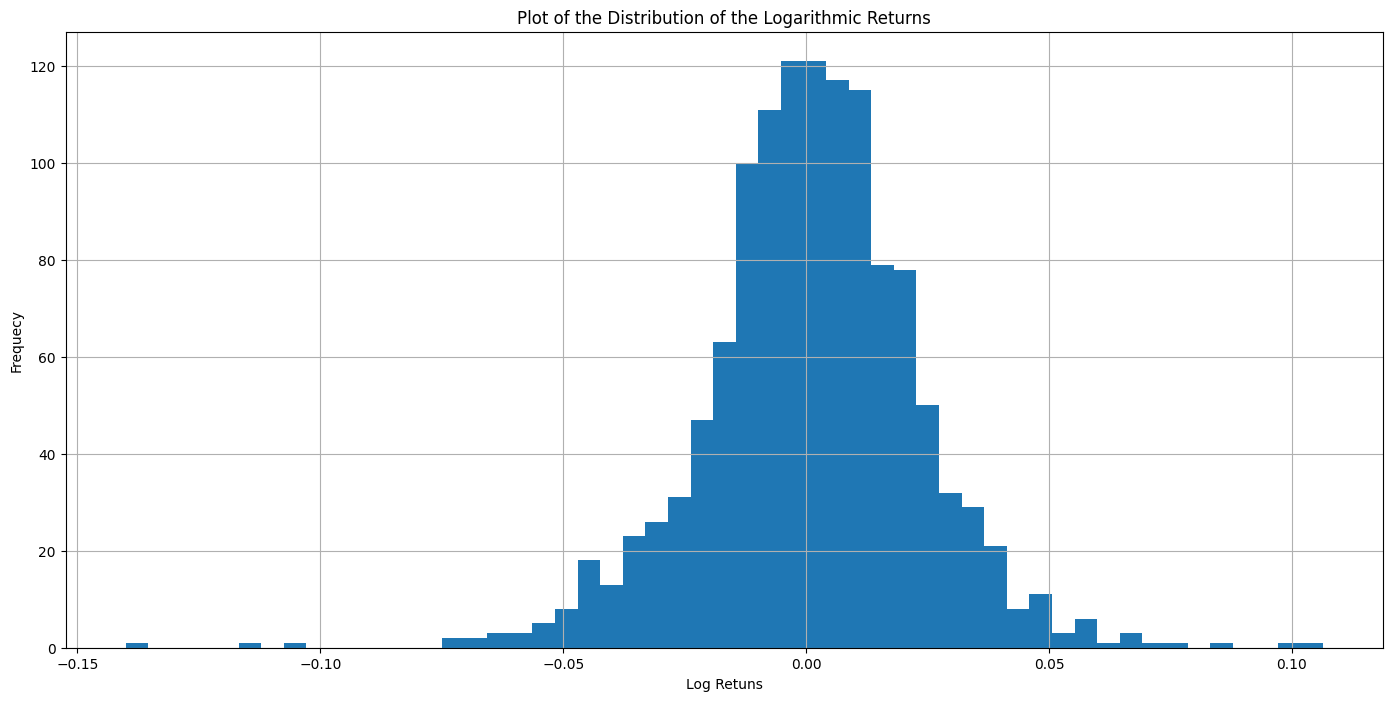

In [6]:
# Plot of the Distribution of the Log Returns.
ax = plt.figure()
ax.set_figwidth(17)
ax.set_figheight(8)
log_returns.hist(bins='auto')
plt.xlabel('Log Retuns')
plt.ylabel('Frequecy')
plt.title('Plot of the Distribution of the Logarithmic Returns')

In [7]:
# log returns follow the normal distribution then returns will follow the log normal distribution.

# mean of the log return.
u = log_returns.mean()

# variance of the log return.
var = log_returns.var()

# drift of the log return. (Mean of log normal distribution).
drift = u - (0.5 * var) 

# standard deviation of the log return.
stdev = log_returns.std()

# no. of the forecasts.
intervals = 300

# no. of iterations.
iterations = 10000

# daily  returns is given as.
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(intervals, iterations)))

In [8]:
u

0.0009923649361488803

In [9]:
var

0.0005059335368702489

In [10]:
drift

0.0007393981677137559

In [11]:
stdev

0.02249296638663404

In [12]:
# set initial value as the last closing price.
init_val= df.close.iloc[-1]

# Let us first create en empty matrix such as daily returns.
forecast_list = np.zeros_like(daily_returns)
forecast_list[0] = init_val

# With a simple for loop, we are going to forecast the next 300 days.
for i in range(1, intervals):
    forecast_list[i] = forecast_list[i - 1] * daily_returns[i]
   

# data frame and date time as index.
forecast_list = pd.DataFrame(forecast_list)

# concat two data frame.
close = df.close
close = pd.DataFrame(close)
close= close.set_index(df.index)
frames = [close, forecast_list]
monte_carlo_forecast = pd.concat(frames)
monte_carlo_forecast.reset_index(drop= True, inplace=True)

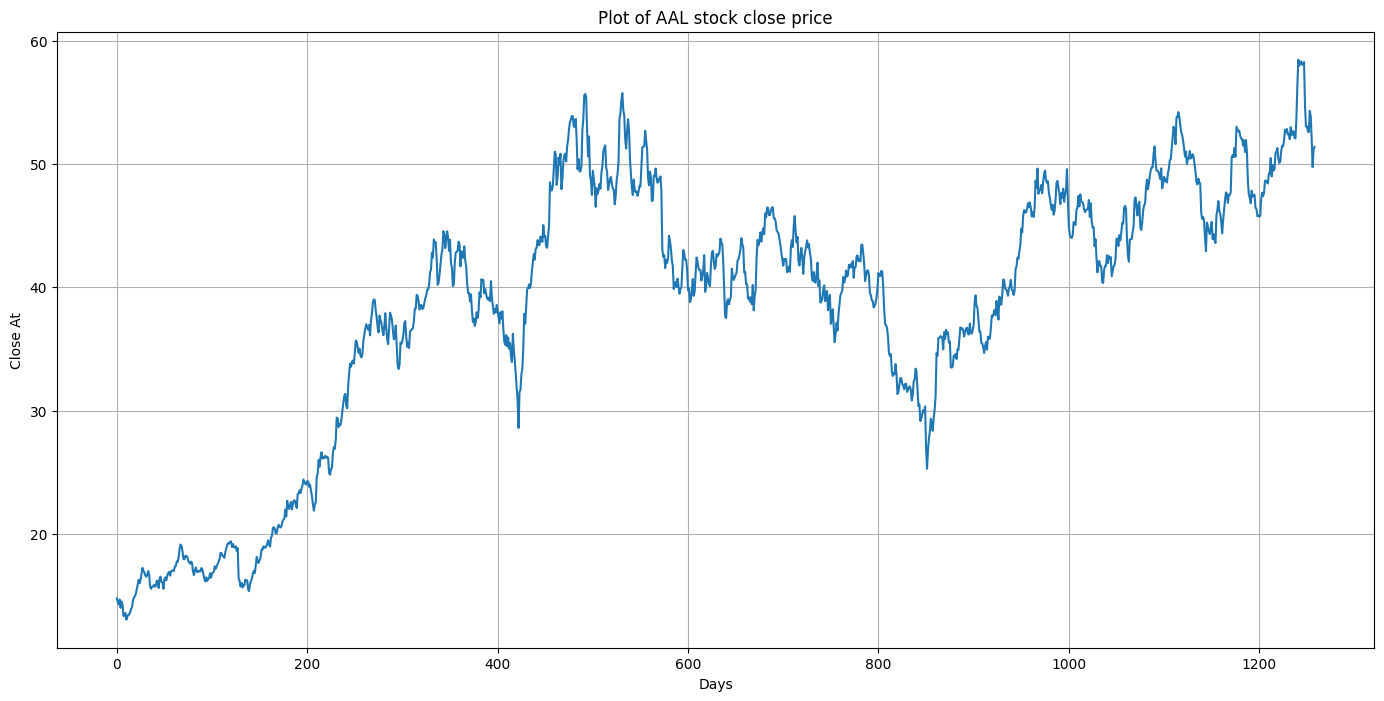

In [13]:
# Plot of AAL stock close price.
plt.figure(figsize=(17,8))
plt.plot(close)
plt.xlabel('Days')
plt.ylabel('Close At')
plt.title('Plot of AAL stock close price')
plt.grid(True)
plt.show()

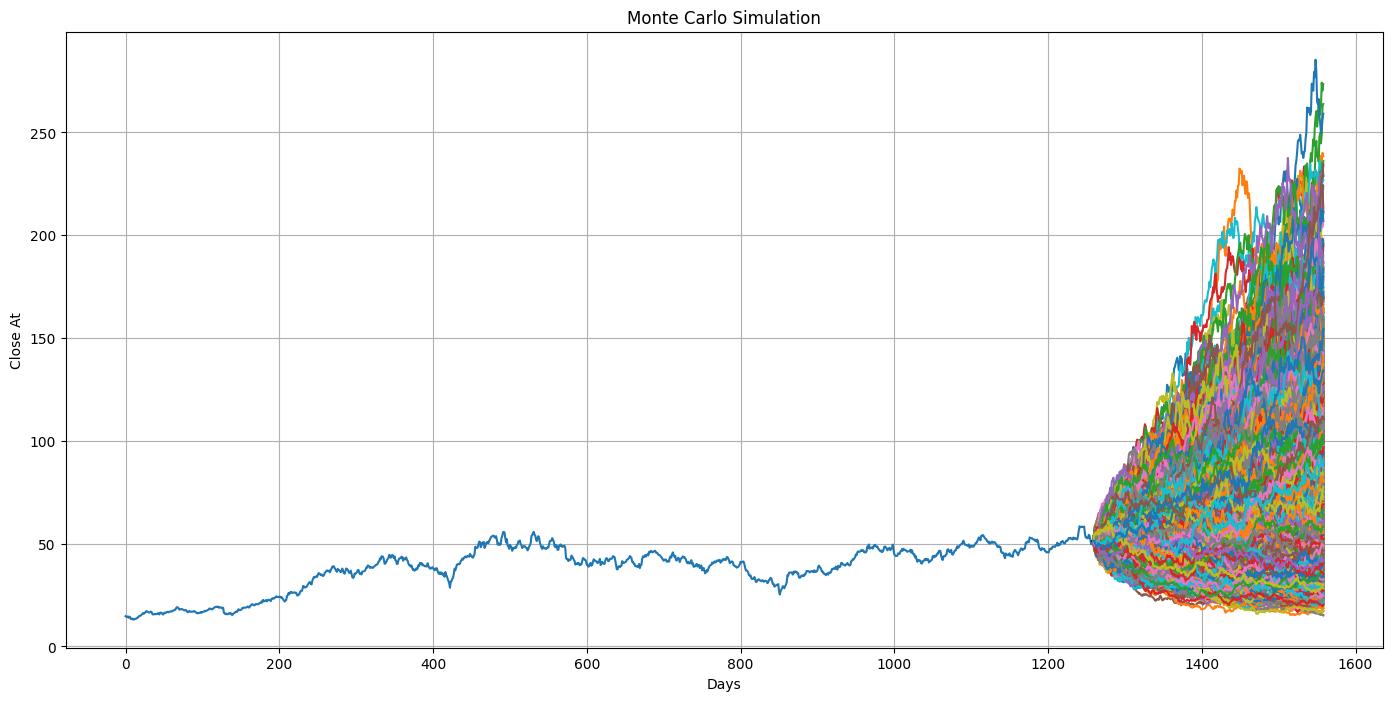

In [14]:
# Plot of Monte Carlo Simulation.
plt.figure(figsize=(17,8))
plt.plot(monte_carlo_forecast)
plt.xlabel('Days')
plt.ylabel('Close At')
plt.title('Monte Carlo Simulation')
plt.grid(True)
plt.show()

In [15]:
# maximun value of the return.
forecast_list[-1:].values.max()

273.53964817642526

In [16]:
# minimun value of the return.
forecast_list[-1:].values.min()

15.0089293048652

In [17]:
# continous interval frequencies distribution.
x=pd.cut(forecast_list[-1:].values.ravel(),[0,init_val,200]).value_counts()

# reindex.
index_ = ['Decrease', 'Increase']
x.index=index_

# relative frequencies (Probability of a stock price decrease or increase).
x/len(forecast_list[-1:].values.ravel())

Decrease    0.2857
Increase    0.7126
dtype: float64

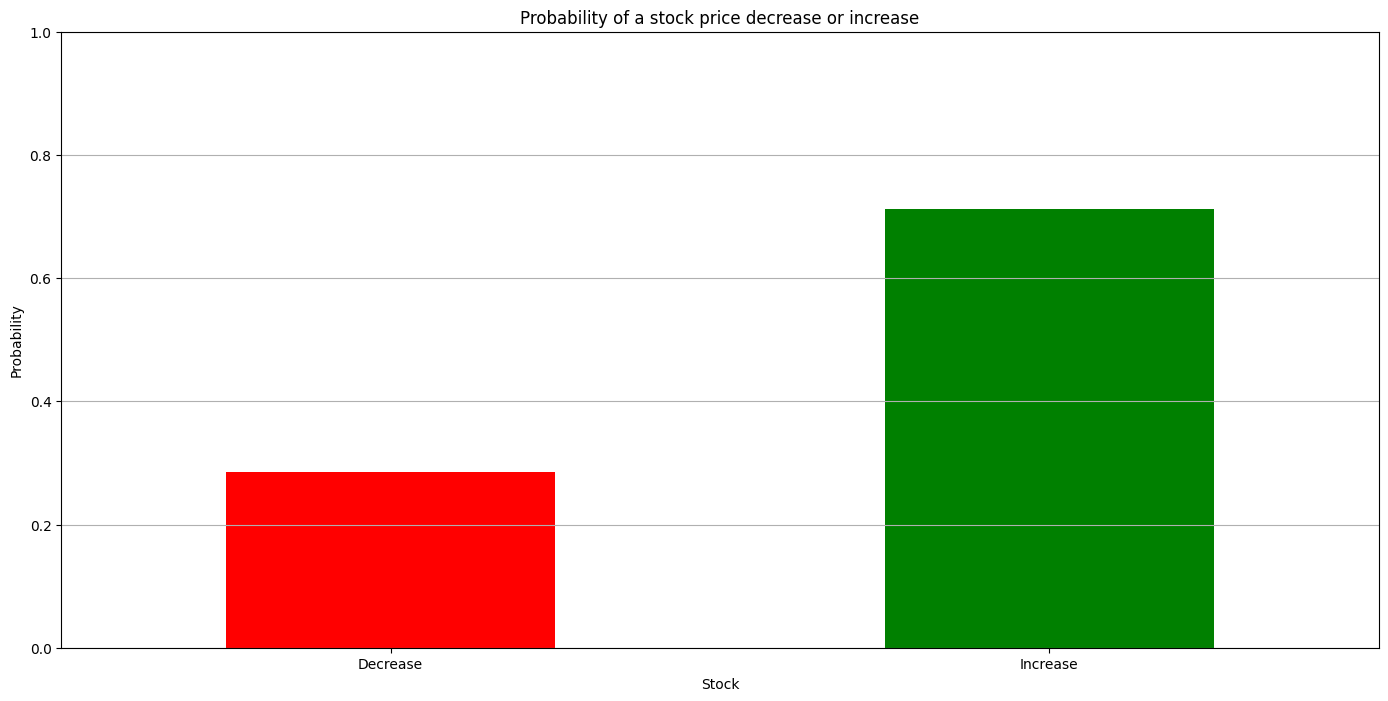

In [18]:
# Bar garph of Probability of a stock price decrease or increase.
ax = plt.figure()
ax.set_figwidth(17)
ax.set_figheight(8)
(x/len(forecast_list[-1:].values.ravel())).plot(kind='bar',color=['red','green'])
plt.xticks(rotation=0)
plt.xlabel('Stock')
plt.ylabel('Probability')
plt.title('Probability of a stock price decrease or increase')
plt.ylim(0,1)
plt.grid(axis = 'y')


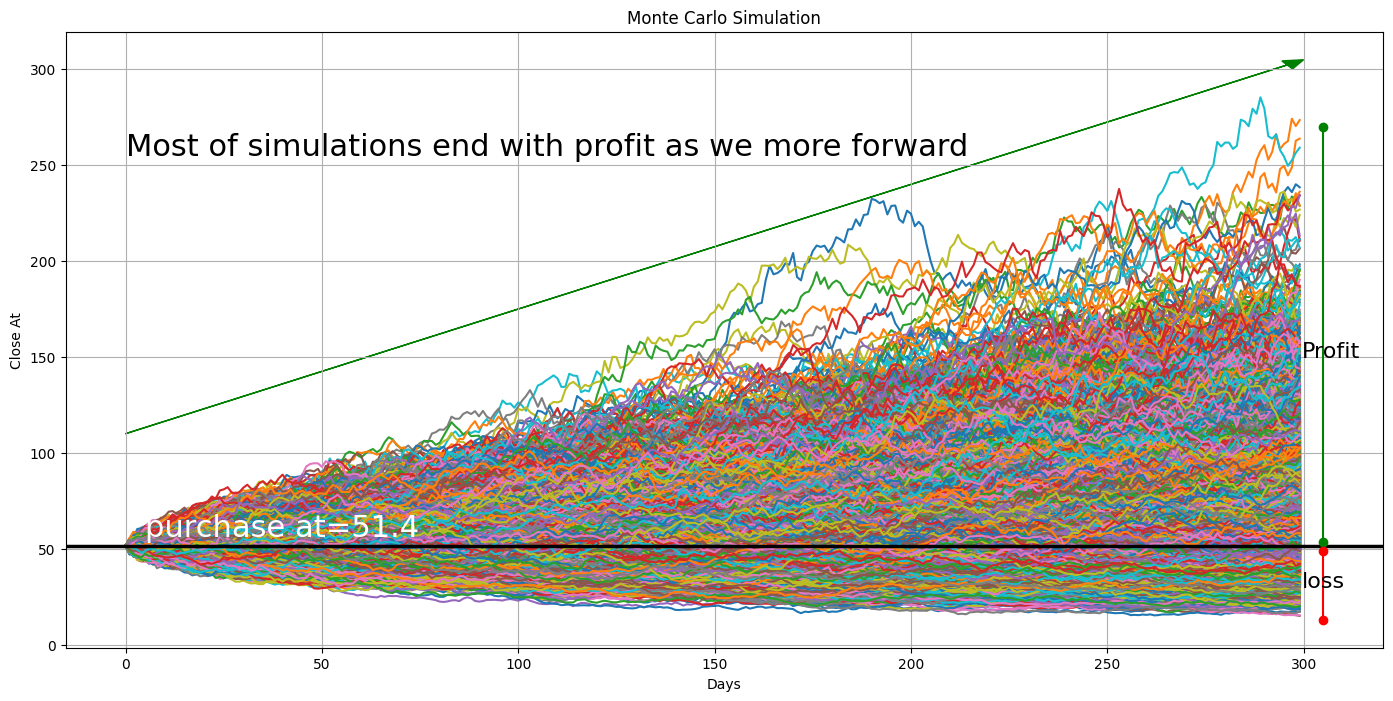

In [19]:
# Plot of Monte Carlo Simulation.
plt.figure(figsize=(17,8))
plt.plot(forecast_list)
plt.xlabel('Days')
plt.ylabel('Close At')
plt.title('Monte Carlo Simulation')
plt.axhline(y = init_val, color = 'black', linestyle = '-',linewidth=2.5)
plt.text(5, init_val+5, 'purchase at=51.4 ', fontsize = 22,color='white')
plt.text(299.5, 150, 'Profit', fontsize = 16,color='black')
plt.text(299.5, 30, 'loss', fontsize = 16,color='black')
plt.plot([305,305], [53.5,270],color='green', linestyle = '-',marker = 'o')
plt.plot([305,305], [49,13],color='red', linestyle = '-',marker = 'o')
plt.arrow(0,110,300,195, length_includes_head=True,
          head_width=5, head_length=5, color='green')
plt.text(0, 255, 'Most of simulations end with profit as we more forward', fontsize = 22,color='black')
plt.grid(True)
plt.show()